# Découverte du epsilon numérique

Il existe principalement deux types de données flottantes
- le réel simple précision sur 32 bits (4 octets)
- le réel double précision sur 64 bits (8 octets)

Ces valeurs sont codées en base 2 selon la norme IEEE qui définit de manière complète le rôle de chacun des 32/64 bits dans la représentation mémoire de la valeur réelle.

Pour un nombre réel sur 64 bits, on a
- un bit de signe
- 11 bits d'exposant (sur une base de puissance de 2)
- 52 bits de mantisse

La mantisse est un nombre compris entre 0 et 1 et dont la valeur finale est évaluée en fonction des bits $b_1$, $b_2$ ... $b_{52}$ selon la formule
$$M=\sum_{i=1}^{52}\frac{1}{2^i}$$
Moyennant quoi la valeur finale du nombre est de la forme
$$x=\pm 2^{exposant}\times 1.M$$

Avec une telle représentation, le terme $2^{exposant}$ nous donne l'ordre de grandeur de la valeur, et $M$ ses décimales mais en valeur relative. Ainsi, la machine n'est pas en mesure de faire la distinction entre 
$$x_1=\pm 2^{exposant}\times 1.M$$
et
$$x_2=\pm 2^{exposant}\times 1.\left(M+2^{-53}\right)$$
pour lesquelles la différence en valeur absolue est $2^{exposant}\times 2^{-53}$.

On parle alors d'erreur de précision numérique dans la représentation de la variable $x$. Cette erreur est en valeur relative et dépend donc de l'ordre de grandeur de $x$.
- Dans le cas d'une valeur unitaire, l'erreur de précision absolue est $2^{-53}$,
- Dans le cas d'une valeur de l'ordre de $10^3$, l'erreur de précision absolue est de l'ordre de $2^{10}\times2^{-53}\simeq2^{-43}$
- Dans le cas d'une valeur de l'ordre de $10^{20}$, l'erreur de précision absolue est de l'ordre de $2^{66}\times2^{-53}\simeq2^{13}=8192$

## Premier exemple - évaluation du epsilon numérique

Le premier code que vous devez écrire ici est relativement simple :
- prenez une valeur de $x$ égale à 1
- calculer la plus petite valeur de $n$ entier telle que $x = x + 2^{-n}$ 
- refaire tourner le même code avec $x=10^3$, $x=10^6$, $x=10^9$, ...

In [2]:
from mpmath import *



print(mp)
mp.dps = 45

n = 1
x = 1 
x1 = mpf(x+2**(-n))
x2 = mpf(x)

while x1 != x2 :
    n +=1 
    x1 = mpf(x+2**(-n))
    x2 = mpf(x)
    
print(n,2**(-n))

n = 1
x = 10e3
x1 = mpf(x+2**(-n))
x2 = mpf(x)

while x1 != x2 :
    n +=1 
    x1 = mpf(x+2**(-n))
    x2 = mpf(x)
    
print(n,2**(-n))

n = 1
x = 10e6 
x1 = mpf(x+2**(-n))
x2 = mpf(x)

while x1 != x2 :
    n +=1 
    x1 = mpf(x+2**(-n))
    x2 = mpf(x)
    
print(n,2**(-n))

n = 1
x = 10e9
x1 = mpf(x+2**(-n))
x2 = mpf(x)

while x1 != x2 :
    n +=1 
    x1 = mpf(x+2**(-n))
    x2 = mpf(x)
    
print(n,2**(-n))






Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]
53 1.1102230246251565e-16
40 9.094947017729282e-13
30 9.313225746154785e-10
20 9.5367431640625e-07


## Deuxième exemple - la non-associativité de l'addition

Un autre exemple très simple et rapide à mettre en oeuvre consiste à montrer que l'addition n'est plus associative. Pour cela on va calculer $(a+b)+c$ et $a+(b+c)$ pour différentes valeurs de $a$, $b$ et $c$.

On pourra ainsi considérer les valeurs suivantes
- $a=10^n$
- $b=-10^n$
- $c=1$
pour différentes valeurs de l'entier $n$. Trouver en particulier à partir de quelle valeur de $n$ les deux expressions $(a+b)+c$ et $a+(b+c)$ diffèrent.

In [3]:
from mpmath import *


mp.dps = 15
print(mp)

n = 1
x = 1 
a = mpf(10**n)
b = mpf(-10**n)
c = mpf(1)

x1 = mpf((a+b)+c)
x2 = mpf(a+(b+c))

while x1 == x2 :
    n +=1 
    a = mpf(10**n)
    b = mpf(-10**n)

    x1 = mpf((a+b)+c)
    x2 = mpf(a+(b+c))
    
print(";)")
print(n,2**(-n))

Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]
;)
16 1.52587890625e-05


## Troisième exemple - inversion d'un système simple

Le troisième exemple, très facile et rapide à coder et assez illustrateur de la problématique numérique, consiste à inverser un système linéaire 2x2 de la forme
$$
    (I)~\left\{\begin{array}
    xx_1+x_2 & = & 1 \\
    10^{-n}x_1+x_2 & = & 0.5 \\
    \end{array}\right.
~~~~~~~~~~
    (II)~\left\{\begin{array}
    110^{-n}x_1+x_2 & = & 0.5 \\
    x_1+x_2 & = & 1 \\
    \end{array}\right.
$$
A ces deux systèmes on applique la méthode dite du pivot de Gauss avec les étapes suivantes
- on garde inchangée la première équation, on retire à la deuxième équation un multiple de la première équation calculé de telle sorte que l'on élimine la dépendance en $x_1$
- le système étant alors triangulaire, on calcule $x_2$ de la deuxième équation
- on en déduit $x_1$

Ecrire un code qui met en oeuvre cet algorithme avec chacun des deux systèmes pour différentes valeurs de $n$. Que peut-on en déduire par rapport à la méthode de résolution d'un tel système ?

In [4]:


# (I)

n = 20
x12 = mpf((0.5-10**(-n))/(1-10**(-n)))
x11 = mpf(1 - x12)
x22 = mpf((1-0.5/10**(-n))/(1-1/10**(-n)))
x21 = mpf((0.5 - x22)/10**(-n))

print(";)")
print(n,x11, x21,x11 == x21, x22, x12,x22 == x12)





;)
20 0.5 0.0 False 0.5 0.5 True


## Calcul d'une série alternée

On s'intéresse ici au calcul de la série
$$S_N(x)=\sum_{n=0}^N(-1)^n\frac{x^{2n}}{2n!}$$
Dans un premier temps on ne se préoccupe pas de la convergence de la série, mais uniquement du calcul de la somme.

Ecrire un code Python permettant de calcul $S_N(x)$ pour une valeur de $x$ donnée (on pourra par exemple considérer $x=1.5$) :
- créer une fonction permettant de calculer $n!$
- créer une fonction permettant de calculer $u_n(x)=x^{2n}/2n!$
- calculer la somme $S_N(x)$
- évaluer et représenter graphiquement le temps de calcul en fonction de $N$
- quelle est la complexité numérique de ce calcul par rapport à $N$ ?

1


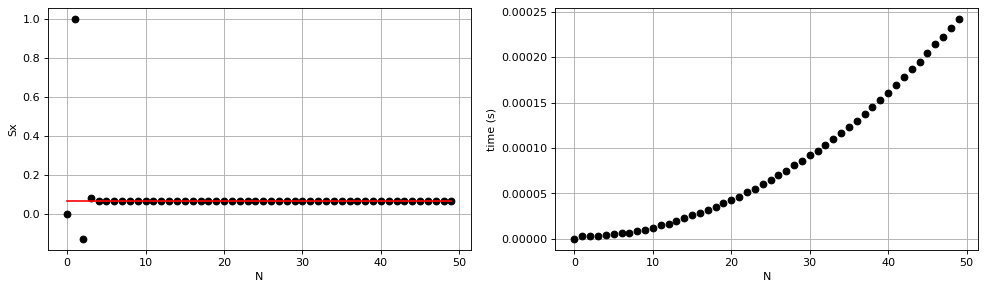

In [5]:
import time
import matplotlib.pyplot as plt
import numpy as np

def fact(n) :
    fact = 1 
    
    if n >= 1 :
        while n >= 1 :
            fact = fact*n
            n -= 1

    elif n == 0 :
        fact = 1
    
    return fact

print(fact(0))

def Un(x,n):
    return x**(2*n)/(fact(2*n))

def Sx(x,N) :
    inicio = time.time()
    S = 0
    for i in range(N):
        S = S + ((-1)**i)*Un(x,i)
        
    fin = time.time()
    t = (fin-inicio)
    return S, t

def graphs(x,N) :
    S = np.zeros(N)
    t = np.zeros(N)
    n = np.zeros(N)
    for i in range(N):
        S[i], t[i] = Sx(x,i)
        n[i] = i

    plt.figure(figsize=(15, 4), dpi=80)
    plt.subplot(1,2,1)
    plt.plot(n,S,'ko',n,np.ones_like(n)*np.cos(x),'r')
    plt.grid('minor')
    plt.xlabel('N')
    plt.ylabel('Sx')

    plt.subplot(1,2,2)
    plt.plot(n,t,'ko')
    plt.grid('minor')
    plt.xlabel('N')
    plt.ylabel('time (s)')

    plt.show()
    
graphs(1.5,50)    
    

Réécrire le code précédent avec une complexité linéaire en $N$.
Pour atteindre la complexité linéaire il faut remarquer la relation de récurrence
$$u_{n+1}(x)=\frac{x^2}{(2n+2)(2n+1)}u_n(x)$$

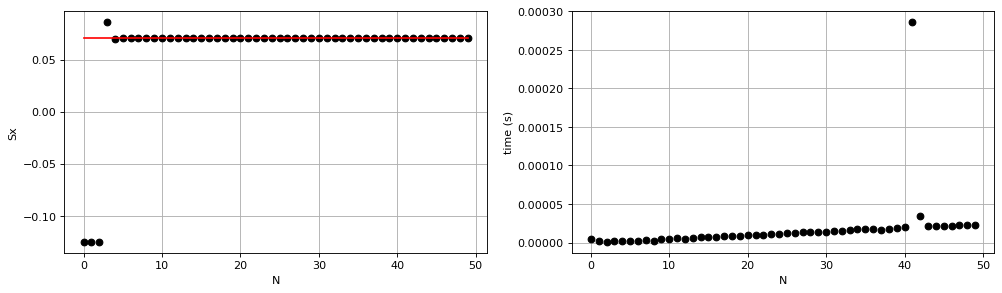

In [6]:
def S2x(x,N) :
    inicio = time.time()
    S = 0
    U0 = Un(x,0)
    S = S + U0
    Un1 = x**2/((2*0+2)*(2*0+1))*U0
    S = S + ((-1)**1)*Un1
    for i in range(2,N):
        Un1 = x**2/((2*(i-1)+2)*(2*(i-1)+1))*Un1
        S = S + ((-1)**(i))*Un1
        
    fin = time.time()
    t = (fin-inicio)
    return S, t

def graphs2(x,N) :
    S = np.zeros(N)
    t = np.zeros(N)
    n = np.zeros(N)
    for i in range(N):
        S[i], t[i] = S2x(x,i)
        n[i] = i

    plt.figure(figsize=(15, 4), dpi=80)
    plt.subplot(1,2,1)
    plt.plot(n,S,'ko',n,np.ones_like(n)*np.cos(x),'r')
    plt.grid('minor')
    plt.xlabel('N')
    plt.ylabel('Sx')

    plt.subplot(1,2,2)
    plt.plot(n,t,'ko')
    plt.grid('minor')
    plt.xlabel('N')
    plt.ylabel('time (s)')

    plt.show()
    
graphs2(1.5,50)

Calculer
$$\sum_{n=0}^{+\infty}(-1)^n\frac{x^{2n}}{2n!}$$
en limitant le nombre de termes dans la somme par un critère de convergence adéquat. 
Comparer le résultat obtenu avec $\cos(x)$.

On fera ce calcul pour $x=1$, $x=5$, $x=10$, $x=25$, $x=50$. Commentaires ?

True
Pour x =  1  On a besoin de n =  2
True
Pour x =  5  On a besoin de n =  2
True
Pour x =  10  On a besoin de n =  2
True
Pour x =  25  On a besoin de n =  2
True
Pour x =  50  On a besoin de n =  2
NORMAL
x = 1


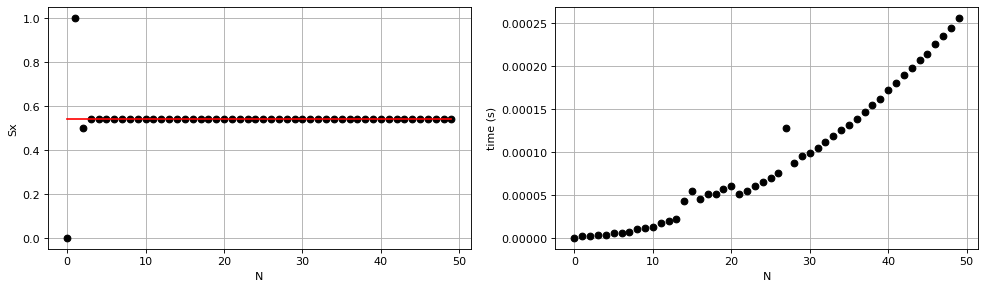

x = 5


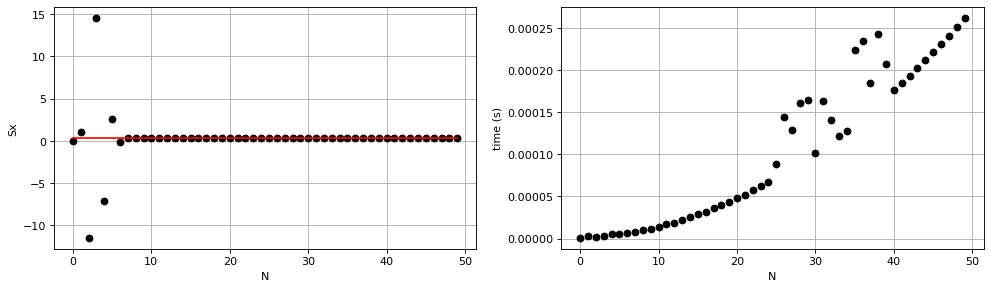

x = 10


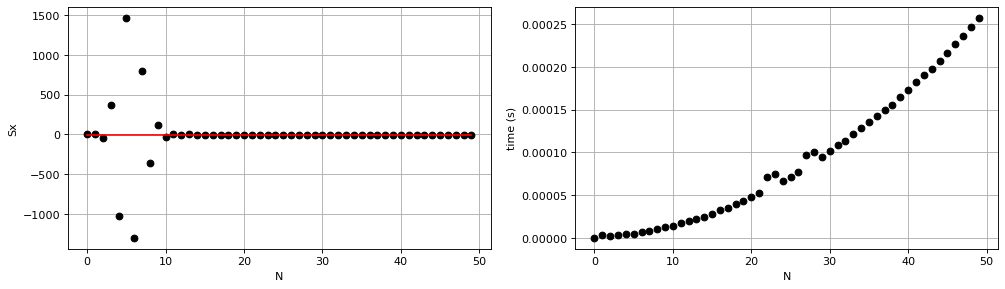

x = 25


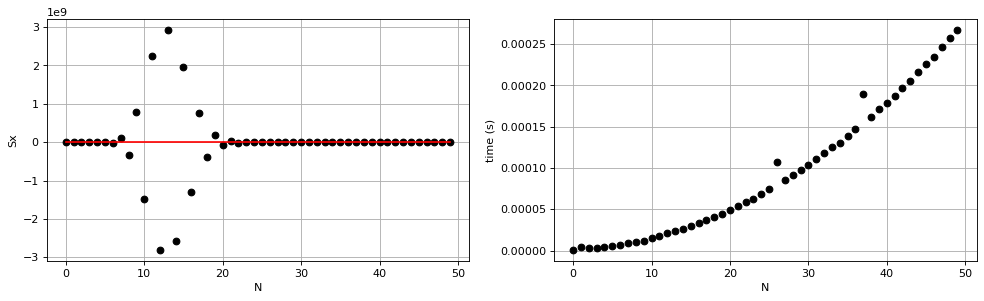

x = 50


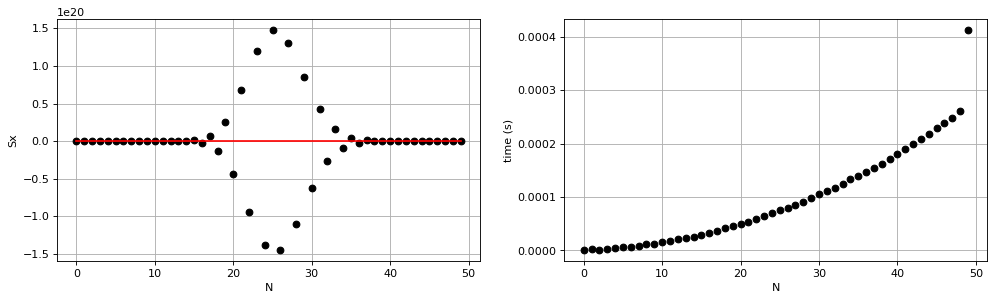

LINÉARISÉE
x = 1


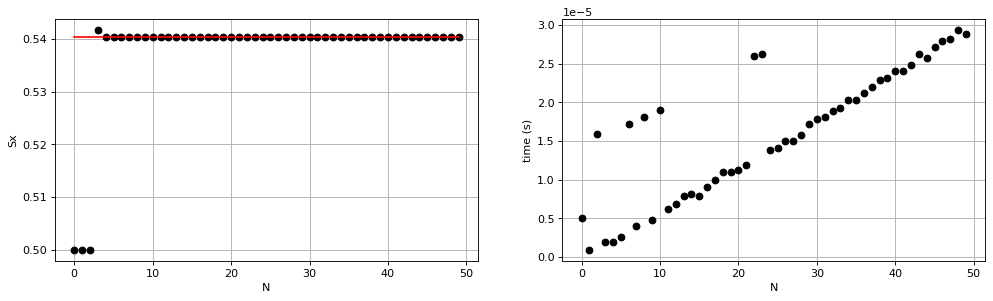

x = 5


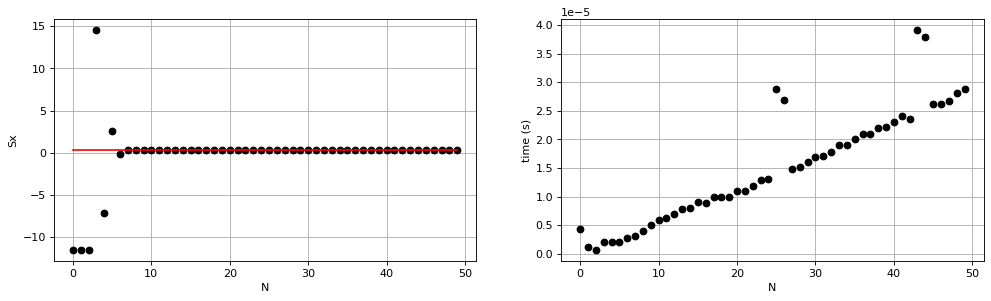

x = 10


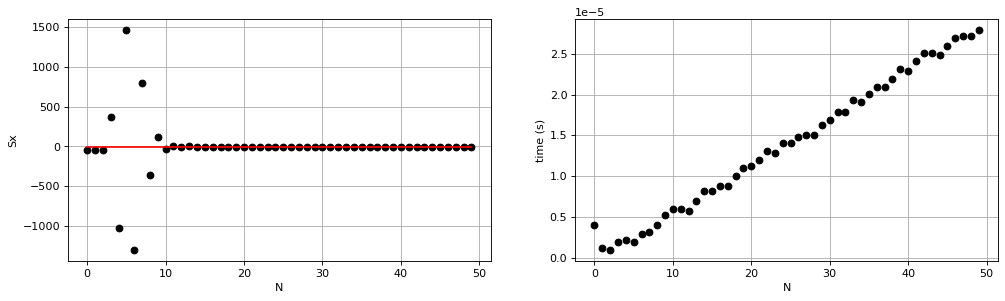

x = 25


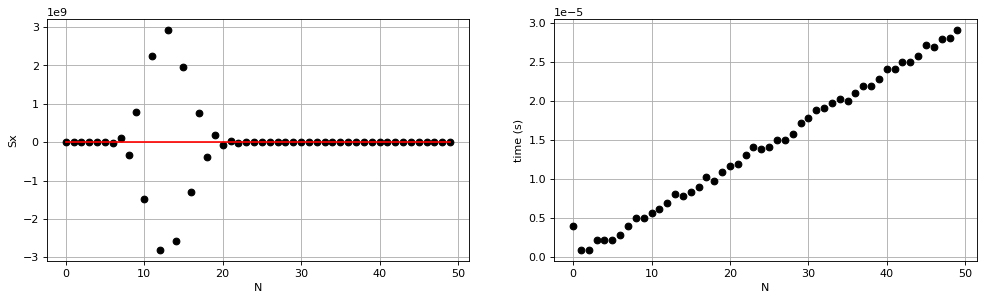

x = 50


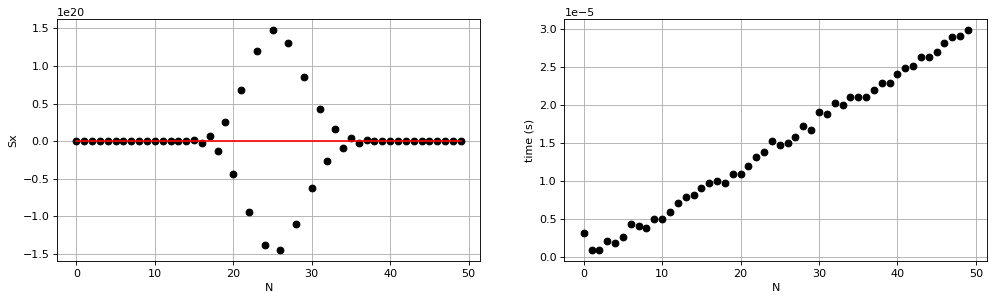

In [7]:

def Conv(x) :
    n = 1
    S1, t = S2x(x,n)
    S2 = S1 + 1

    while np.abs(S2-S1) >= 10e-5 and n < 60 :
        S2 = S1
        S1, t = S2x(x,n)
        print(S1==S2)
        n += 1
    print("Pour x = ",x," On a besoin de n = ",n)
    return n    
    
Conv(1)
Conv(5)
Conv(10)
Conv(25)
Conv(50)

print("NORMAL")
print("x = 1")
graphs(1,50) 
print("x = 5")
graphs(5,50) 
print("x = 10")
graphs(10,50) 
print("x = 25")
graphs(25,50) 
print("x = 50")
graphs(50,50)

print("LINÉARISÉE")
print("x = 1")
graphs2(1,50) 
print("x = 5")
graphs2(5,50) 
print("x = 10")
graphs2(10,50) 
print("x = 25")
graphs2(25,50) 
print("x = 50")
graphs2(50,50)


Afin de mieux comprendre la nature des résultats obtenus :
- comment varie $x^{2n}$ avec $n$ ?
- comment varie $1/2n!$ avec $n$ ?
- comment varie $u_n(x)$ avec $n$ ? on pourra ici utiliser une représentation graphique de $u_n(x)$ en fonction de $n$, par exemple pour $x=50$.

Conclusions ?

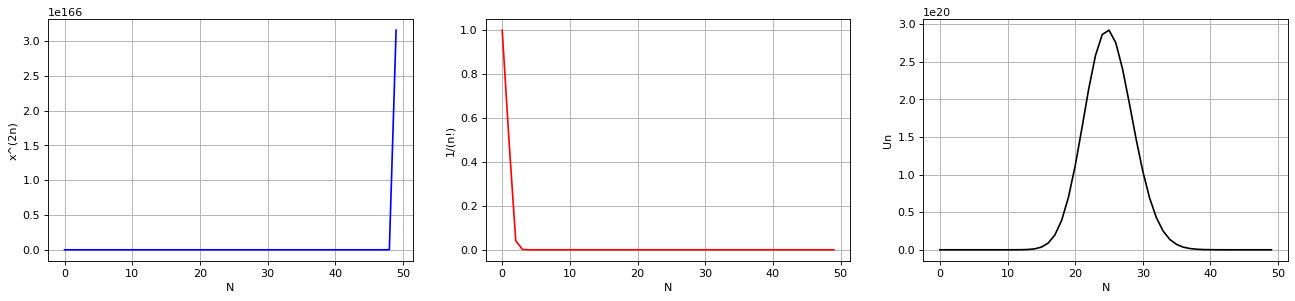

In [8]:
def num(x,n) :
    return x**(2*n) 

def den(n) :
    return 1/fact(2*n) 

def comp(x,N) :
    numerador = np.zeros(N)
    denominador = np.zeros(N)
    U = np.zeros(N)
    n = np.zeros(N)
    for i in range(N):
        U[i] = Un(x,i)
        numerador[i] = num(x,i)
        denominador[i] = den(i)
        n[i] = i

    plt.figure(figsize=(20, 4), dpi=80)
    plt.subplot(1,3,1)
    plt.plot(n,numerador,'b')
    plt.grid('minor')
    plt.xlabel('N')
    plt.ylabel('x^(2n)')
    
    plt.subplot(1,3,2)
    plt.plot(n,denominador,'r')
    plt.grid('minor')
    plt.xlabel('N')
    plt.ylabel('1/(n!)')

    plt.subplot(1,3,3)
    plt.plot(n,U,'k')
    plt.grid('minor')
    plt.xlabel('N')
    plt.ylabel('Un')

    plt.show()

comp(50,50)    